### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### Loading the Dataset

In [2]:
df = pd.read_csv('dataset.csv')

df.head()

,X1 = Acid Durability(seconds),X2 = Strength(kg/square meter),Y = Classification
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad


In [3]:
new_names = {}
for col in df.columns:
    new_names[col] = col.split(' ')[0]

In [4]:
df.rename(columns=new_names, inplace=True)

In [5]:
df.head()

,X1,X2,Y
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad


In [6]:
mapping = {'Bad': 0, 'Good': 1}
inv_mapping = {0: 'Bad', 1: 'Good'}

### Data Visualization

In [7]:
good = df['Y'] == 'Good'
bad = df['Y'] == 'Bad'

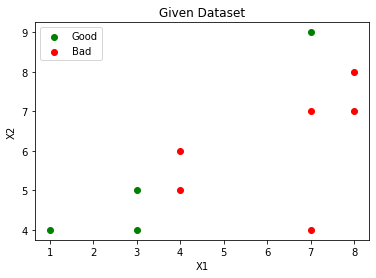

In [8]:
plt.scatter(df['X1'][good], df['X2'][good], c='green', label='Good')
plt.scatter(df['X1'][bad], df['X2'][bad], c='red', label='Bad')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Given Dataset')
plt.legend()
plt.show()

### Prepare the Dataset for Training

In [9]:
df['Y'] = df['Y'].map(mapping)

In [10]:
X_train, Y_train = df.drop('Y', axis=1).values, df['Y']

### Define the Testing Point

In [11]:
X_test = np.array([[3, 7]])

### Train and Run the Model for Different Values of k and Distance Metrics

In [12]:
K = [2, 3, 4]
DIST_METRIC = ['Euclidean', 'Manhattan', 'Minkowski']

classification = pd.DataFrame(columns=['K'] + DIST_METRIC)

for k in K:
    row = {'K': k}
    for met in DIST_METRIC:
        model = KNeighborsClassifier(k, metric=met.lower())
        model.fit(X_train, Y_train)
        
        pred = model.predict(X_test)
        row[met] = inv_mapping[pred[0]]
        
    classification = classification.append(row, ignore_index=True)

In [13]:
print('Classification Results for different values of k and distance metrics: ')
print(classification.to_string(index=False))

Classification Results for different values of k and distance metrics: 
K Euclidean Manhattan Minkowski
2       Bad       Bad       Bad
3       Bad      Good       Bad
4       Bad       Bad       Bad


### Draw the Decision Boundary using k=3 and Euclidean Distance Metric

In [14]:
model = KNeighborsClassifier(3, metric='euclidean')
model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [15]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
xxyy_test = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(xxyy_test)
Z = Z.reshape(xx.shape)

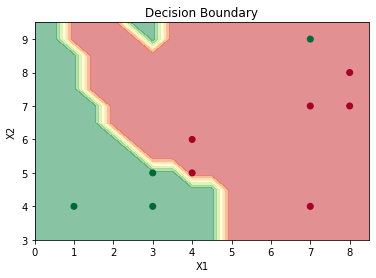

In [16]:
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.RdYlGn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()